In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
pd.set_option("display.max_columns", 50)

In [2]:
# Making dataframe from clean data
df = pd.read_csv("../clean_data/clean_victimization_data.csv")
df.head()

,Year,Weight,Sex,Race,Hispanic origin,Race/Hispanic origin,Age,Marital status,Household income,Population size,Region,Location of residence,Victim-offender relationship,Reporting to the police,Presence of Weapon,Weapon category,Aggregate type of crime,Type of crime,Violent crime excluding simple assault,Injury,Medical treatment for physical injuries,Victim services,Location of incident
0,1995,3463.13071,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never married,"50,000 to 74,999","250,000 to 499,999",West,Urban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Robbery,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
1,1995,2497.65395,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
2,1995,2521.20834,Female,Black,Non-Hispanic,Non-Hispanic black,25 to 34,Never married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stanger,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
3,1995,2023.97373,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1995,12143.84238,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."


In [3]:
# Empty graph for the income by race data to be put in
graph_df = pd.DataFrame()

# For loop running through each unique race value and adding it to graph_df
for race in df['Race/Hispanic origin'].unique():
    print(race)
    race_df = df[df['Race/Hispanic origin'] == f"{race}"]
    race_series = race_df['Household income'].value_counts()
    by_income = race_series.to_frame().reset_index()
    by_income.rename(columns={by_income.columns[1]:f"{race}"}, inplace=True)
    
    if graph_df.empty:
        graph_df = by_income
    else:
        graph_df = graph_df.merge(by_income, on='index')

graph_df

Non-Hispanic white
Non-Hispanic black
Hispanic
Non-Hispanic other


,index,Non-Hispanic white,Non-Hispanic black,Hispanic,Non-Hispanic other
0,"75,000 or more",5535,367,583,389
1,Unknown,4794,1135,1030,380
2,"50,000 to 74,999",4524,399,559,268
3,"35,000 to 49,999",4257,531,705,245
4,"25,000 to 34,999",3459,589,794,249
5,"15,000 to 24,999",3455,865,889,256
6,"7,500 to 14,999",2876,895,717,285
7,"Less than 7,500",2115,866,493,201


In [4]:
# Sorting rows to descending order of income
graph_df.rename(columns={'index':'Household income'}, inplace=True)
graph_df['order'] = [7, 0, 6, 5, 4, 3, 2, 1]
graph_df.sort_values('order', ascending=False, inplace=True)
graph_df.reset_index(inplace=True)
graph_df.drop('index', axis=1, inplace=True)
graph_df.drop('order', axis=1, inplace=True)
graph_df

,Household income,Non-Hispanic white,Non-Hispanic black,Hispanic,Non-Hispanic other
0,"75,000 or more",5535,367,583,389
1,"50,000 to 74,999",4524,399,559,268
2,"35,000 to 49,999",4257,531,705,245
3,"25,000 to 34,999",3459,589,794,249
4,"15,000 to 24,999",3455,865,889,256
5,"7,500 to 14,999",2876,895,717,285
6,"Less than 7,500",2115,866,493,201
7,Unknown,4794,1135,1030,380


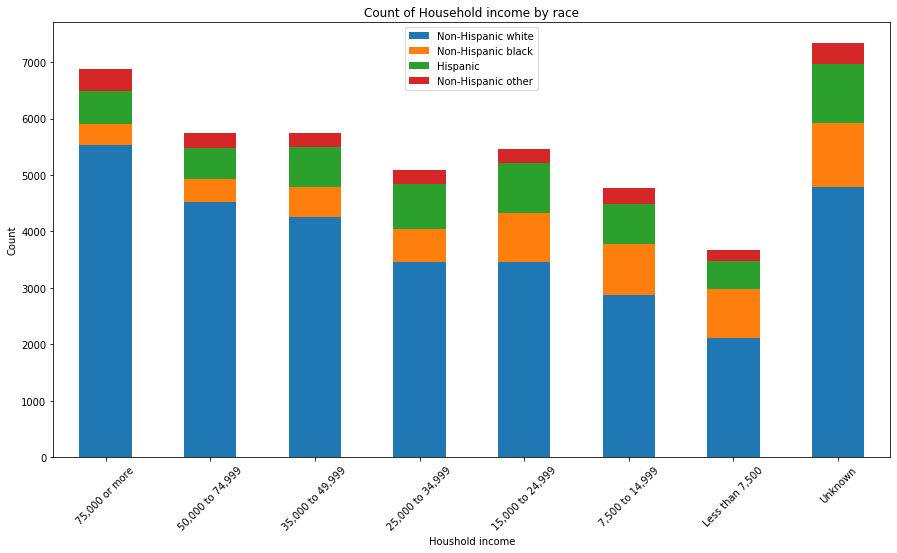

In [7]:
# Making and labeling graph
income_by_race = graph_df.plot(kind='bar', stacked=True, figsize=(15,8))
income_by_race.set_xticklabels(graph_df['Household income'], rotation=45)
income_by_race.set_title('Count of Household income by race')
income_by_race.set_xlabel('Houshold income')
income_by_race.set_ylabel('Count')
income_by_race
plt.savefig('household_income_by_race')
plt.show()